### Reccessary 爬蟲程式

In [17]:
import pandas as pd
import numpy as np
import requests as re
from bs4 import BeautifulSoup

from matplotlib import pyplot as plt
import matplotlib


### 爬蟲程式執行

In [18]:
dfc = pd.DataFrame()
headers = {
    'Accept':
'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',                 
    'User-Agent': 
'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36'
    }

for k in range(0, 10):
  url = 'https://www.reccessary.com/zh-tw/database.php?page=' + str(k)



  res_j = re.get(url, headers=headers)
  res = BeautifulSoup(res_j.text)
  colName = [i.text for i in  res.find_all('table')[0].find_all('tr')[0].find_all('td', {'class':'fixed-th'})]

  n = len(res.find_all('table')[0].find_all('tr'))

  lst = []

  for i in range(1, n):
    row_r = res.find_all('table')[0].find_all('tr')[i]
    row_d = [i.text.replace('\n', '').replace(', ', '').replace(' ', '') for i in row_r.find_all('td')]
    dd = {}
    for j in range(len(colName)):
      dd[colName[j]] = row_d[j]
    lst.append(dd)

  df = pd.DataFrame(lst)
  dfc = pd.concat([dfc, df], axis=0)

### 資料整理
1. 清除重覆列資料
2. 資料格式改變(由於爬蟲下來是文字格式，將數字部份改為數值格式)

In [29]:
dff = dfc.copy()
dff.reset_index(drop=True, inplace=True)
dff.drop_duplicates(inplace=True, subset=['企業'])

dff = dff.replace('N/A', np.nan, regex=True).replace(',', '', regex=True).replace('%', '', regex=True)
dff.iloc[:, [4, 5, -1]] = dff.iloc[:, [4, 5, -1]].apply(pd.to_numeric, errors='coerce')
dff['綠電使用比例'] = dff['綠電使用比例'] * 0.01

### 篩選條件
1. 打印資料中包括那些產業

In [40]:
dfq = dff[['企業', '分類', '每單位營收排放量（tCO2/百萬元）', '綠電使用比例', '總排放量（tCO2）']].copy()
ccls= np.unique(dff['分類'])
print(ccls) 

['服裝及紡織' '石油及天然氣' '衛生保健' '銀行業' '鋼鐵' '電子業']


### 篩選資料

In [50]:
condition = dfq['分類']=='電子業'

dfqq = dfq[condition].copy()

### 繪製氣泡圖

氣泡大小表示tCO2排放的多寡(數值越大代表排放越多；反之亦然)
電子業排放tCO2最多的是 三星集團，排放量為138033000.0


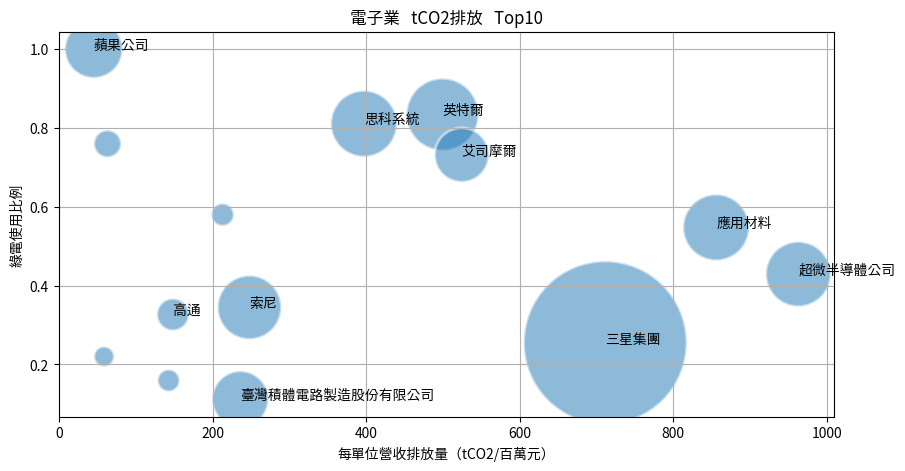

In [51]:
dfqq.dropna(inplace=True, axis=0)

dfqq.reset_index(drop=True, inplace=True)

x = dfqq['每單位營收排放量（tCO2/百萬元）'].to_numpy()
y = dfqq['綠電使用比例'].to_numpy()
s= dfqq['總排放量（tCO2）'].to_numpy()
c = dfqq['企業'].to_numpy()
q = dfqq['分類'].to_numpy()
labels = dfqq['企業'].to_numpy()
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
scatter = ax.scatter(x, y, s=[np.round(i*0.0001, 0) for i in s], alpha=0.5, edgecolors='w', linewidth=2)
ax.set_xlabel('每單位營收排放量（tCO2/百萬元）')
ax.set_ylabel('綠電使用比例')
ax.set_title('{}   tCO2排放   Top10'.format(q[0]))

top_index = np.argsort(s)[-10:]
top_index = top_index[::-1]


lsts = [(i, dfqq.loc[i, '企業']) for i in top_index]


for lst in lsts:
  plt.annotate(lst[1], (x[lst[0]], y[lst[0]]))


ax.grid()
print('氣泡大小表示tCO2排放的多寡(數值越大代表排放越多；反之亦然)')
print('{}排放tCO2最多的是 {}，排放量為{}'.format(q[0], lsts[0][1], s[lsts[0][0]]))
plt.show()
